# AR(1)

The autoregressive model of order 1, denoted by $\text{AR}(1)$, random process is defined by,

$
\begin{align}
X_t=\varphi X_{t-1} + \varepsilon_t
\end{align}
$

where $\varepsilon_t$ are independent and identically distributed random variables with distribution,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

It follows that,

$
\begin{align}
&\text{E}[\varepsilon_t] = 0 \\
&\text{E}[\varepsilon_t^2] = \sigma^2 \\
&\text{E}[\varepsilon_t \varepsilon_s] = \delta_{ts} \sigma^2
\end{align}
$

For  $\text{AR}(1)$ can be shown that in the limit $t \rightarrow \infty$ with $\lvert \varphi \rvert < 1,$

$
\begin{align}
&\lim_{t \to \infty} \text{E}[X_t] = 0 \\
&\lim_{t \to \infty} \text{E}[X_t^2] = \frac{\sigma^2}{1-\varphi^2} \\
&\lim_{t \to \infty} \text{E}[X_t X_{t+n}] = \varphi^n \sigma^2
\end{align}
$

where $n>0$.The autocorrelation function, $\rho_\tau$, is defined by,

$
\begin{align}
\rho_{\tau} = \frac{\text{E}[X_t X_{t+\tau}]}{\sigma^2} = \varphi^{\tau}
\end{align}
$

Convergence of $\rho_{\tau}$ as $\tau \to \infty$ requires that $\lvert \varphi \rvert < 1$.

### Relation to $\text{MA}(\infty)$
AR(1) is related to $\text{MA}(\infty)$. To see this consider,

$
\begin{align}
X_t = \left( 1 - \varphi L \right)^{-1} \varepsilon_t
\end{align}
$

where $L$ is the lag operator,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

In the limit $t \to \infty$ it can be shown that for $\lvert \varphi \rvert < 1$,

$
\begin{align}
\left( 1 - \varphi L \right)^{-1} = \sum_{i = 0}^{\infty} \varphi^i L^i
\end{align}
$

It follows that,

$
\begin{align}
X_t = \sum_{i=0}^{\infty} \varphi^i L^i \varepsilon_t
\end{align}
$

which is $\text{MA}(\infty)$ with $\vartheta_i = \varphi^i$.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib import stats
from lib.plots.data import (DataPlotType, stack)
from lib.plots.func import (FuncPlotType, fcompare)
from lib.plots.cum import (CumPlotType, cumulative)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
nseries = 3
σ = 1.0

def plot_labels(φ):
    return [f"φ={val}" for val in φ]
               
def ar1_series(φ, nsample):
    series = []
    for i in range(0, nseries):
        series.append(arima.ar1(φ[i], nsample, σ))
    return series

def ar1_ensemble(φ, nsample, nsim):
    series = numpy.array([arima.ar1(φ, nsample, σ)])
    for i in range(1, nsim):
        series = numpy.append(series, numpy.array([arima.ar1(φ, nsample, σ)]), axis=0)
    return series

## Simulation $\varphi$ Scan 

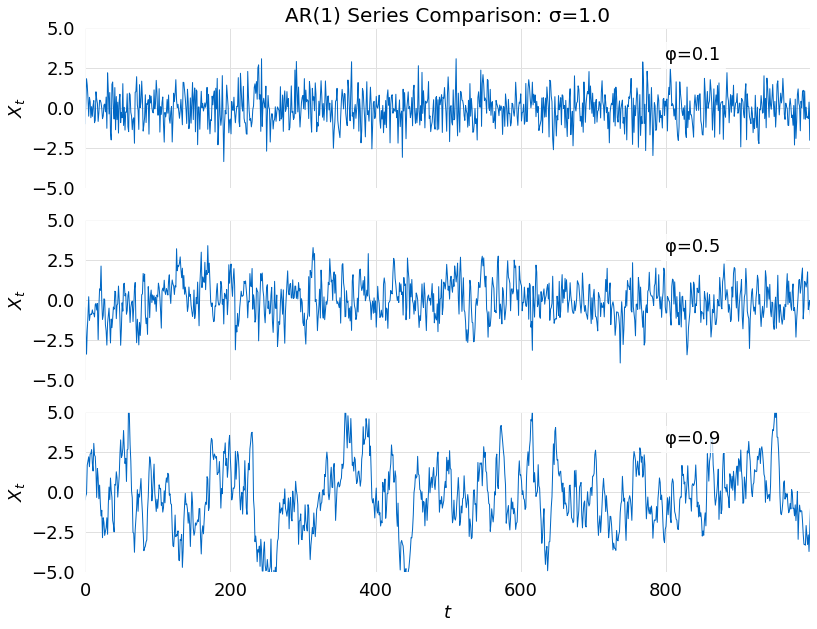

In [3]:
title = f"AR(1) Series Comparison: σ={σ}"
φ = numpy.array([0.1, 0.5, 0.9])
labels = plot_labels(φ) 
series = ar1_series(φ, 1000)
stack(series, ylim=[-5.0, 5.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

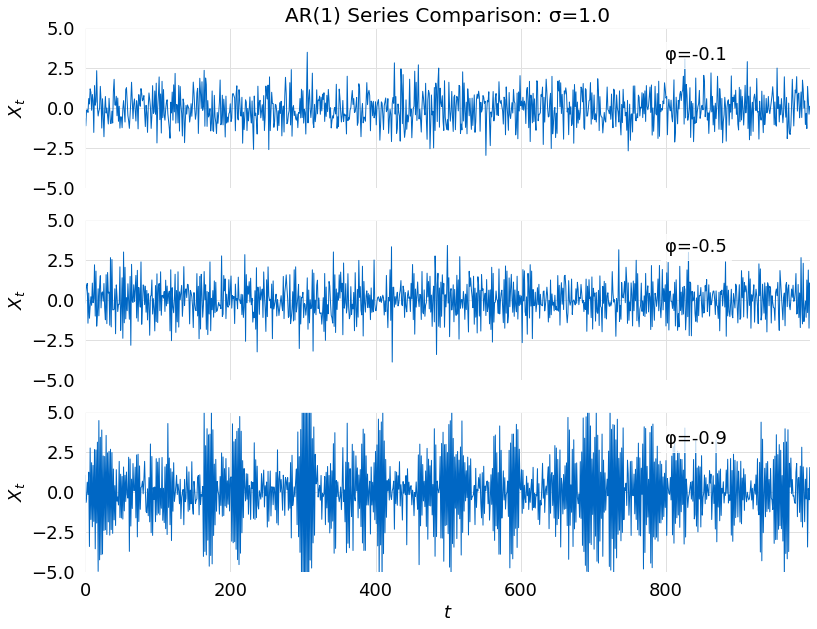

In [4]:
title = f"AR(1) Series Comparison: σ={σ}"
φ = [-0.1, -0.5, -0.9]
labels = plot_labels(φ) 
series = ar1_series(φ, 1000)
stack(series, ylim=[-5.0, 5.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Mean

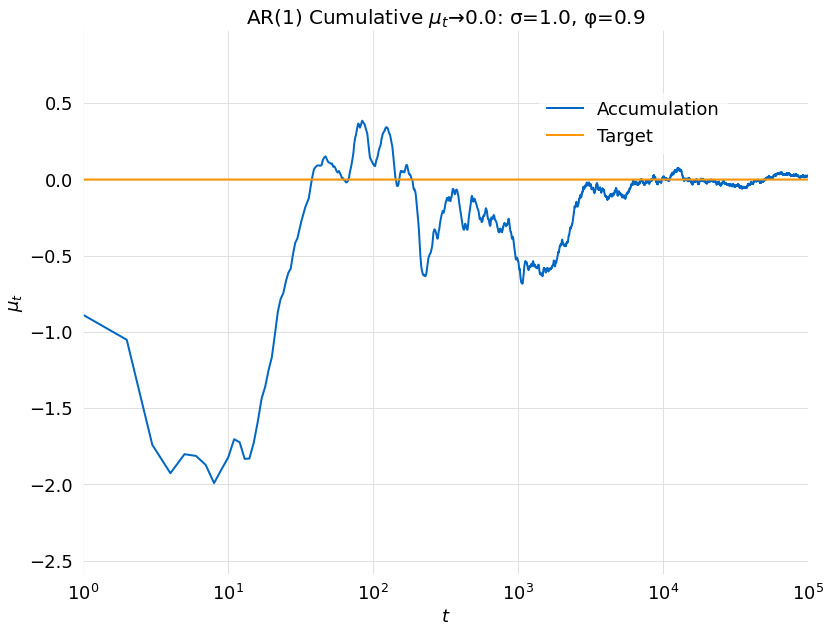

In [5]:
φ = 0.9
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t \to 0.0$: " + f"σ={σ}, φ={φ}"
samples = arima.ar1(φ, nsample, σ)
cumulative(samples, CumPlotType.AR1_MEAN, title=title)

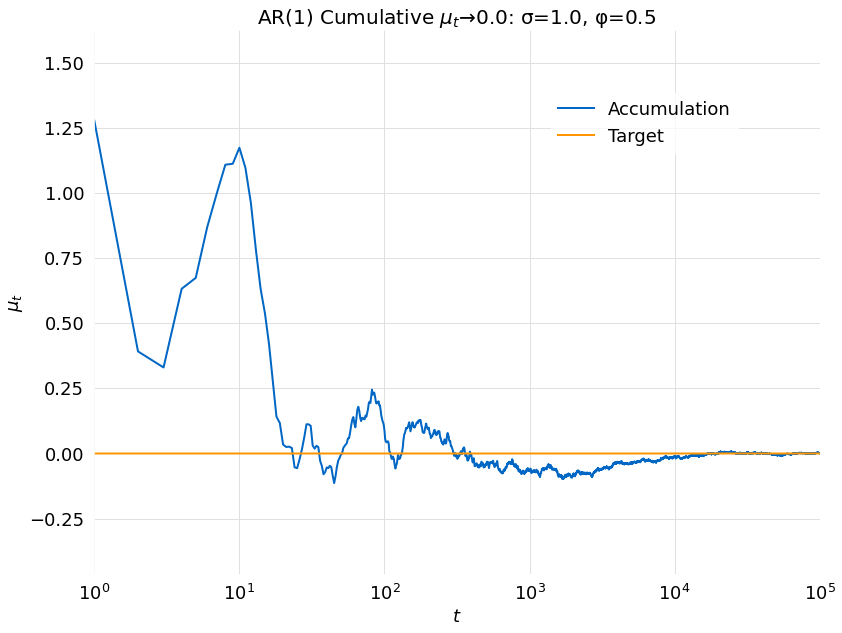

In [6]:
φ = 0.5
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t \to 0.0$: " + f"σ={σ}, φ={φ}"
samples = arima.ar1(φ, nsample, σ)
cumulative(samples, CumPlotType.AR1_MEAN, title=title)

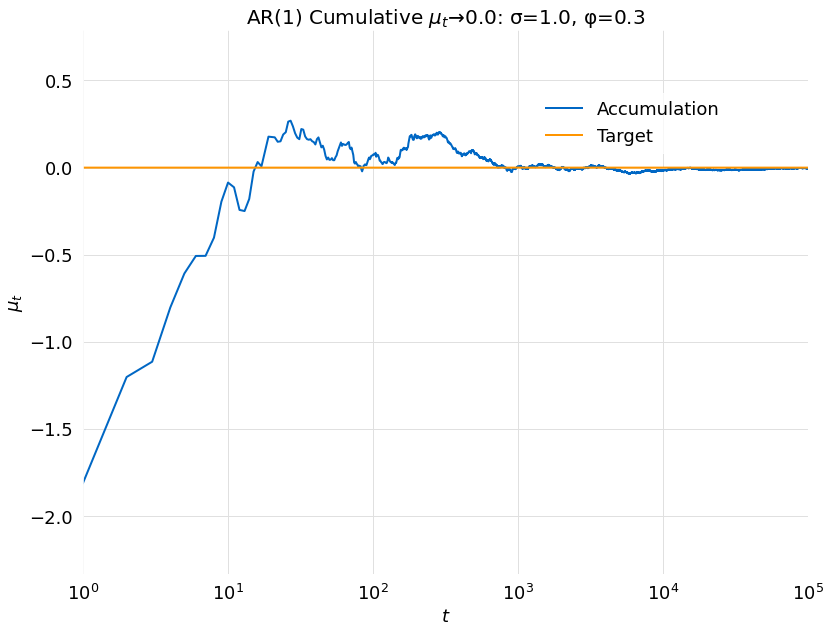

In [7]:
φ = 0.3
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t \to 0.0$: " + f"σ={σ}, φ={φ}"
samples = arima.ar1(φ, nsample, σ)
cumulative(samples, CumPlotType.AR1_MEAN, title=title)

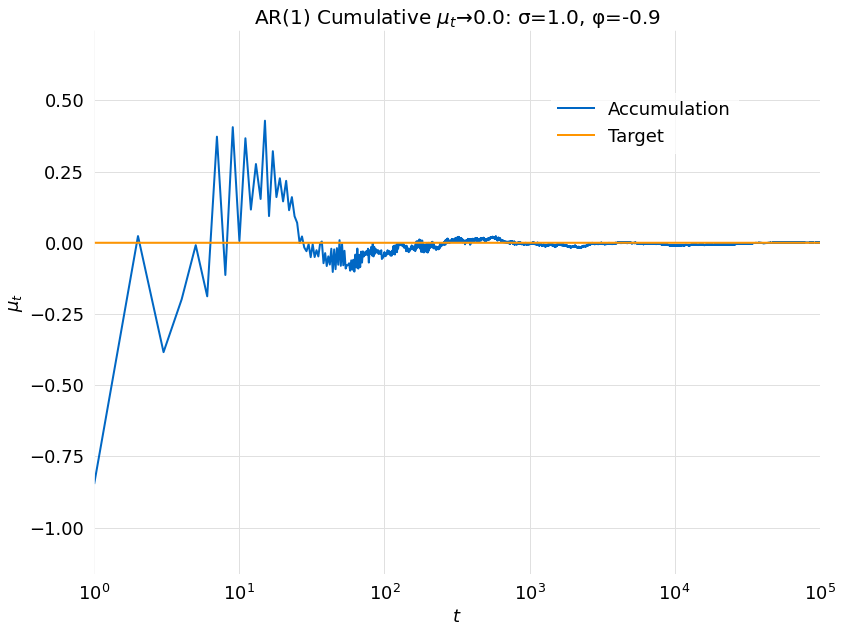

In [8]:
φ = -0.9
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t \to 0.0$: " + f"σ={σ}, φ={φ}"
samples = arima.ar1(φ, nsample, σ)
cumulative(samples, CumPlotType.AR1_MEAN, title=title)

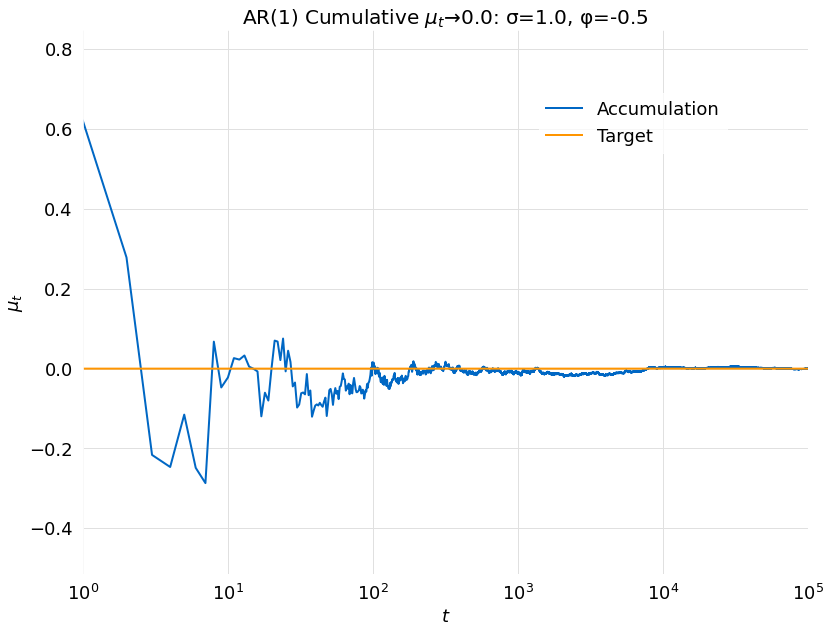

In [9]:
φ = -0.5
title = "AR(1) Cumulative " + r"$\mu_t \to 0.0$: " + f"σ={σ}, φ={φ}"
samples = arima.ar1(φ, nsample, σ)
cumulative(samples, CumPlotType.AR1_MEAN, title=title)

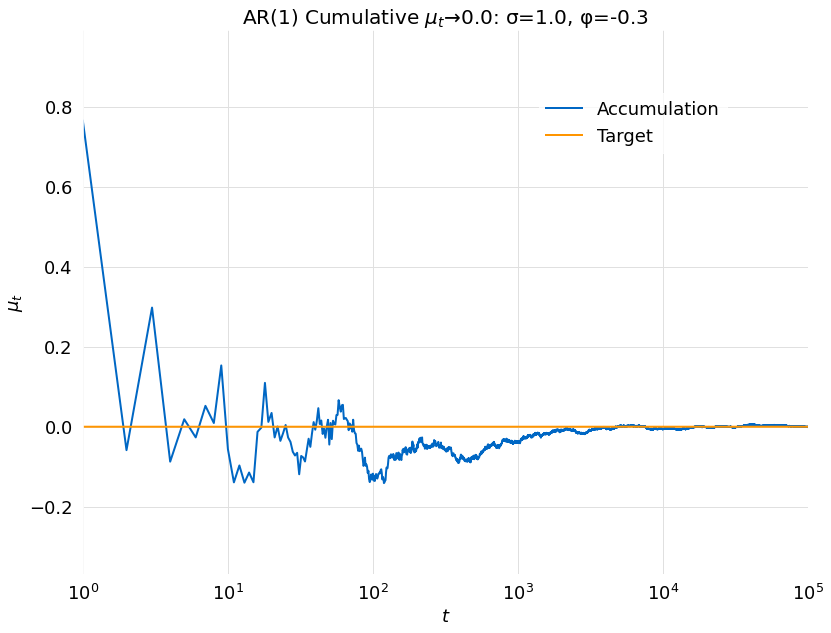

In [10]:
φ = -0.3
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t \to 0.0$: " + f"σ={σ}, φ={φ}"
samples = arima.ar1(φ, nsample, σ)
cumulative(samples, CumPlotType.AR1_MEAN, title=title)

## Standard Deviation

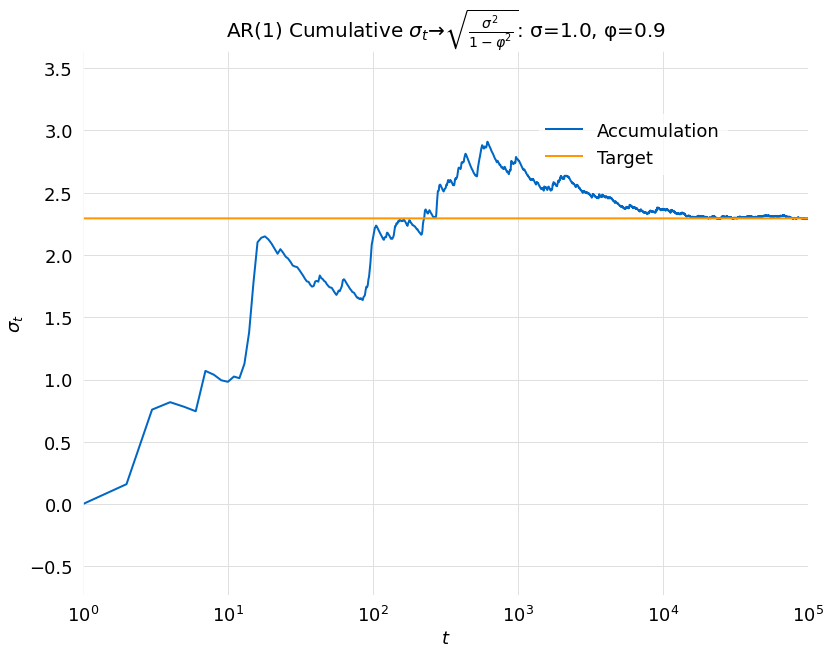

In [11]:
φ = 0.9
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t \to \sqrt{\frac{\sigma^2}{1-\varphi^2}}$: " + f"σ={σ}, φ={φ}"
samples = arima.ar1(φ, nsample, σ)
cumulative(samples, CumPlotType.AR1_STD, title=title, params=[φ])

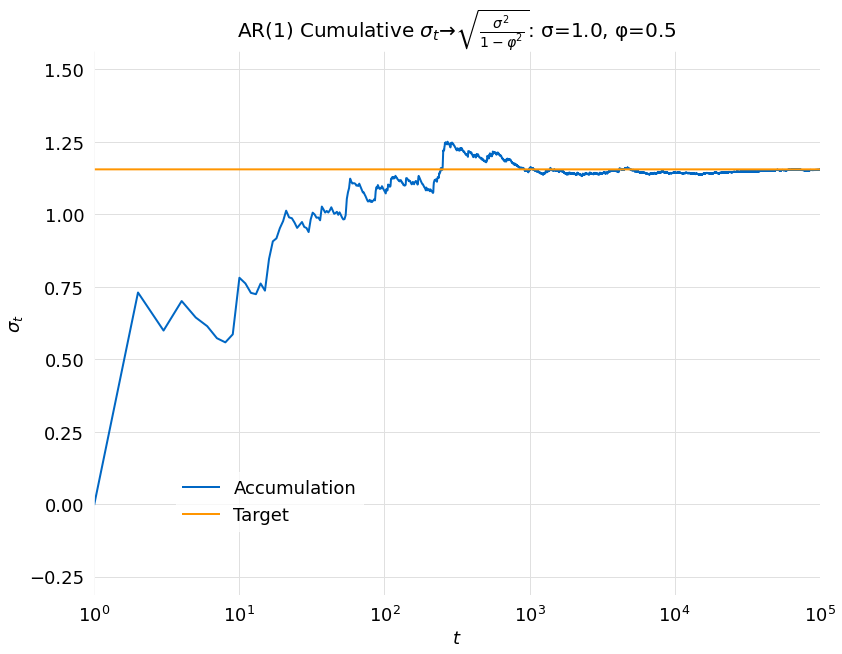

In [12]:
φ = 0.5
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t \to \sqrt{\frac{\sigma^2}{1-\varphi^2}}$: " + f"σ={σ}, φ={φ}"
samples = arima.ar1(φ, nsample, σ)
cumulative(samples, CumPlotType.AR1_STD, title=title, params=[φ])

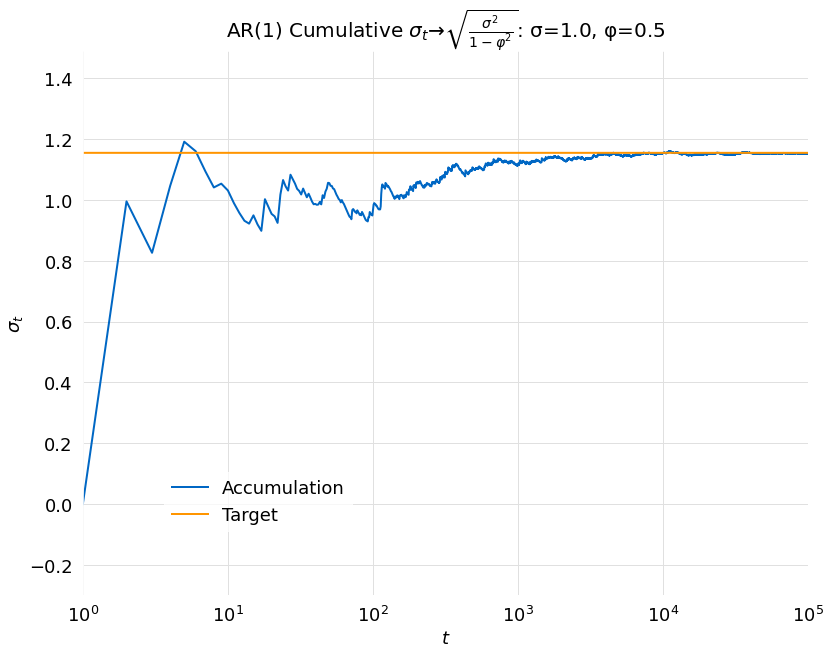

In [13]:
φ = 0.5
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t \to \sqrt{\frac{\sigma^2}{1-\varphi^2}}$: " + f"σ={σ}, φ={φ}"
samples = arima.ar1(φ, nsample, σ)
cumulative(samples, CumPlotType.AR1_STD, title=title, params=[φ])

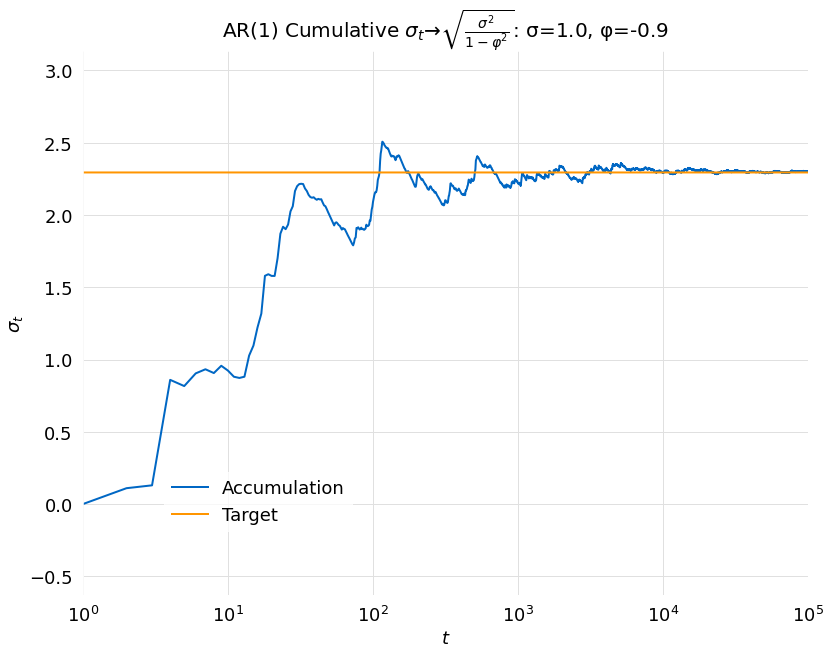

In [14]:
φ = -0.9
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t \to \sqrt{\frac{\sigma^2}{1-\varphi^2}}$: " + f"σ={σ}, φ={φ}"
samples = arima.ar1(φ, nsample, σ)
cumulative(samples, CumPlotType.AR1_STD, title=title, params=[φ])

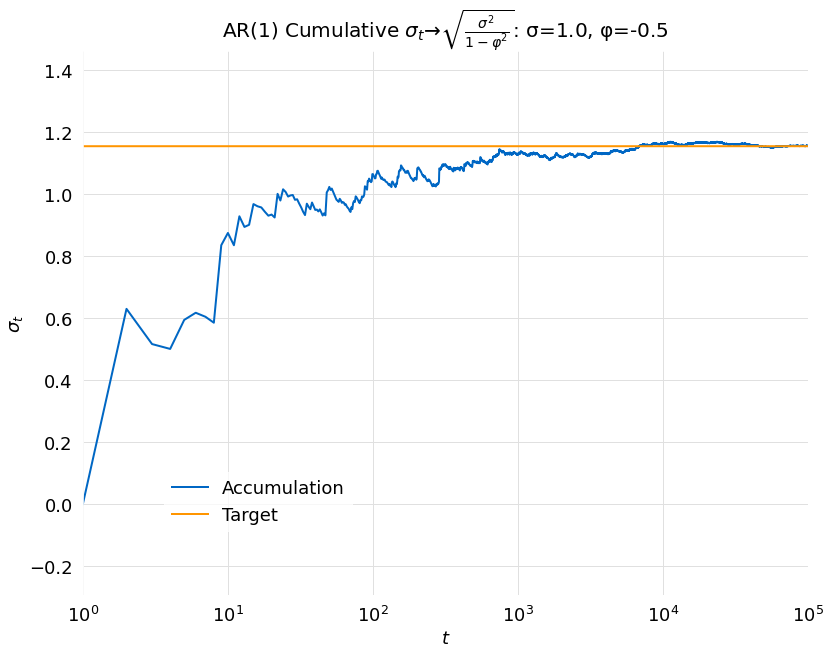

In [15]:
φ = -0.5
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t \to \sqrt{\frac{\sigma^2}{1-\varphi^2}}$: " + f"σ={σ}, φ={φ}"
samples = arima.ar1(φ, nsample, σ)
cumulative(samples, CumPlotType.AR1_STD, title=title, params=[φ])

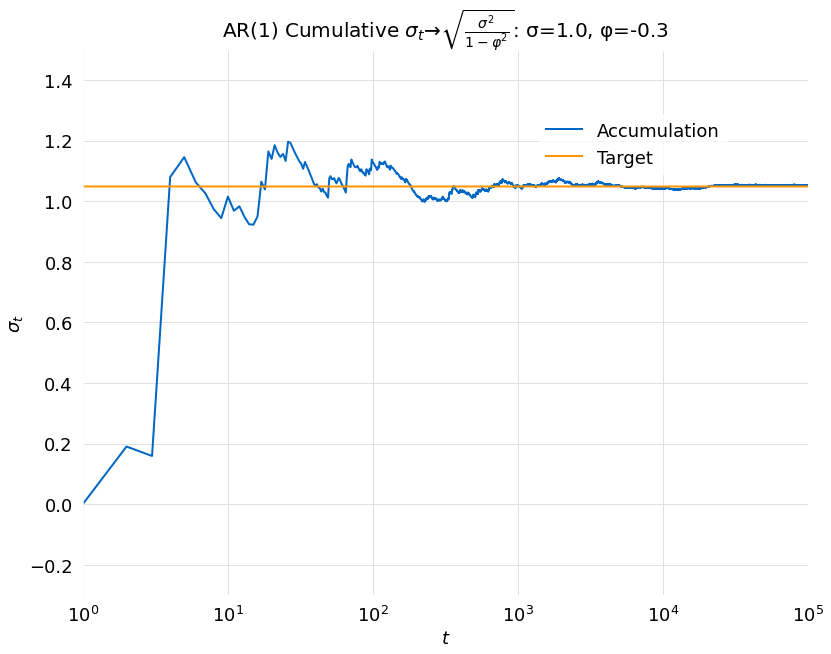

In [16]:
φ = -0.3
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t \to \sqrt{\frac{\sigma^2}{1-\varphi^2}}$: " + f"σ={σ}, φ={φ}"
samples = arima.ar1(φ, nsample, σ)
cumulative(samples, CumPlotType.AR1_STD, title=title, params=[φ])

## Autocorrelation

In [17]:
nsample = 5000
nsim = 1000

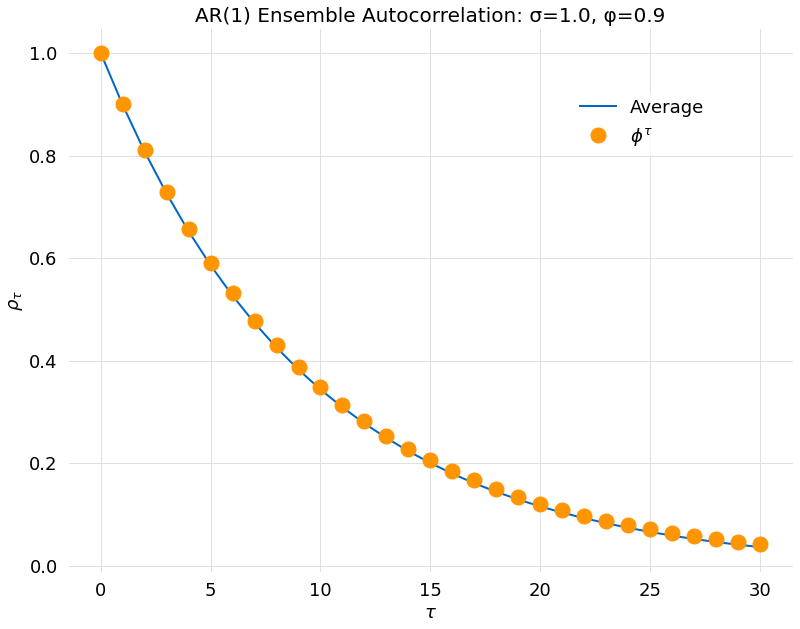

In [18]:
φ = 0.9
nplot = 31
title = f"AR(1) Ensemble Autocorrelation: σ={σ}, φ={φ}"
samples = ar1_ensemble(φ, nsample, nsim)
ac = stats.ensemble_acf(samples) / σ
fcompare(ac[:nplot], title=title, params=[φ], npts=nplot, plot_type=FuncPlotType.AR1_ACF)

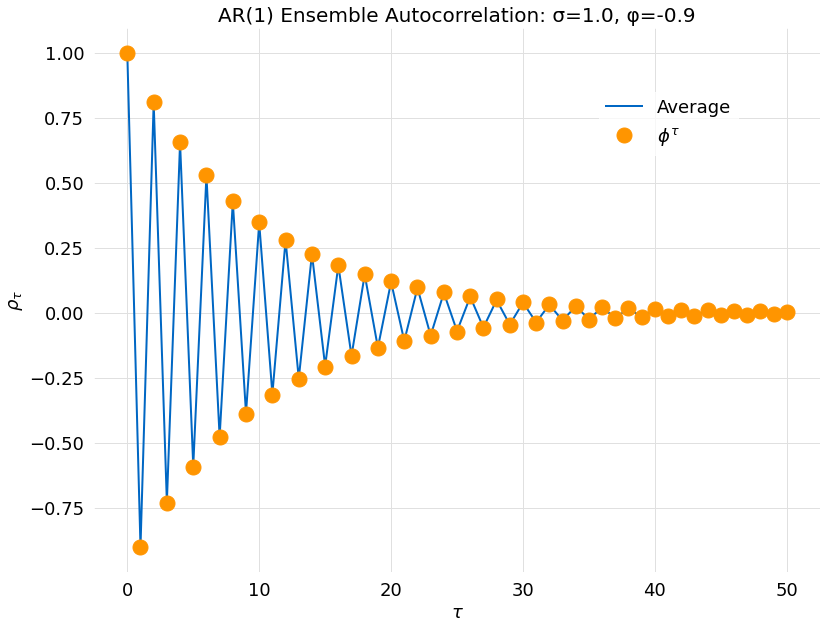

In [19]:
φ = -0.9
nplot = 51
nsample = 5000
nsim = 1000
title = f"AR(1) Ensemble Autocorrelation: σ={σ}, φ={φ}"
samples = ar1_ensemble(φ, nsample, nsim)
ac = stats.ensemble_acf(samples)
fcompare(ac[:nplot], title=title, params=[φ], npts=nplot, plot_type=FuncPlotType.AR1_ACF)

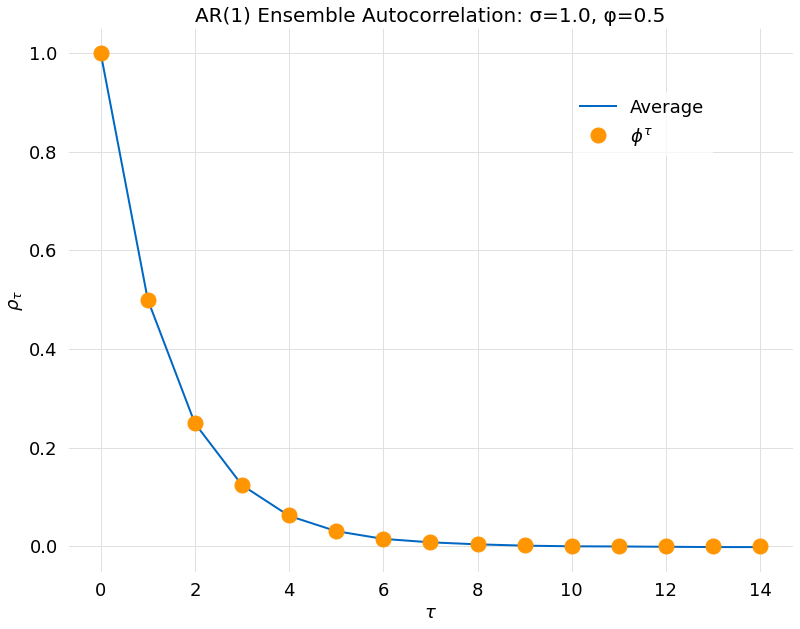

In [20]:
φ = 0.5
nplot = 15
nsample = 5000
nsim = 1000
title = f"AR(1) Ensemble Autocorrelation: σ={σ}, φ={φ}"
samples = ar1_ensemble(φ, nsample, nsim)
ac = stats.ensemble_acf(samples)
fcompare(ac[:nplot], title=title, params=[φ], npts=nplot, plot_type=FuncPlotType.AR1_ACF)

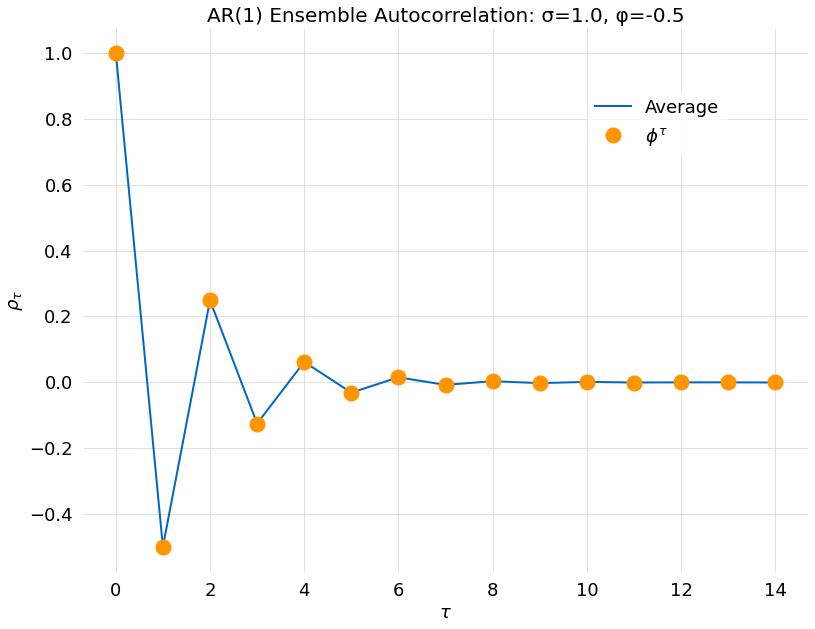

In [21]:
φ = -0.5
nplot = 15
nsample = 5000
nsim = 1000
title = f"AR(1) Ensemble Autocorrelation: σ={σ}, φ={φ}"
samples = ar1_ensemble(φ, nsample, nsim)
ac = stats.ensemble_acf(samples)
fcompare(ac[:nplot], title=title, params=[φ], npts=nplot, plot_type=FuncPlotType.AR1_ACF)

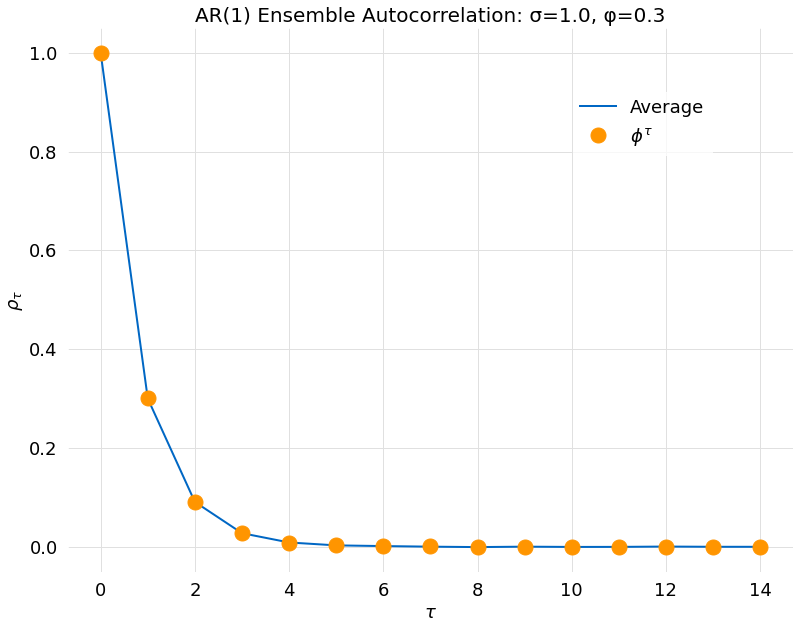

In [22]:
φ = 0.3
nsample = 5000
nsim = 1000
nplot = 15
title = f"AR(1) Ensemble Autocorrelation: σ={σ}, φ={φ}"
samples = ar1_ensemble(φ, nsample, nsim)
ac = stats.ensemble_acf(samples)
fcompare(ac[:nplot], title=title, params=[φ], npts=nplot, plot_type=FuncPlotType.AR1_ACF)

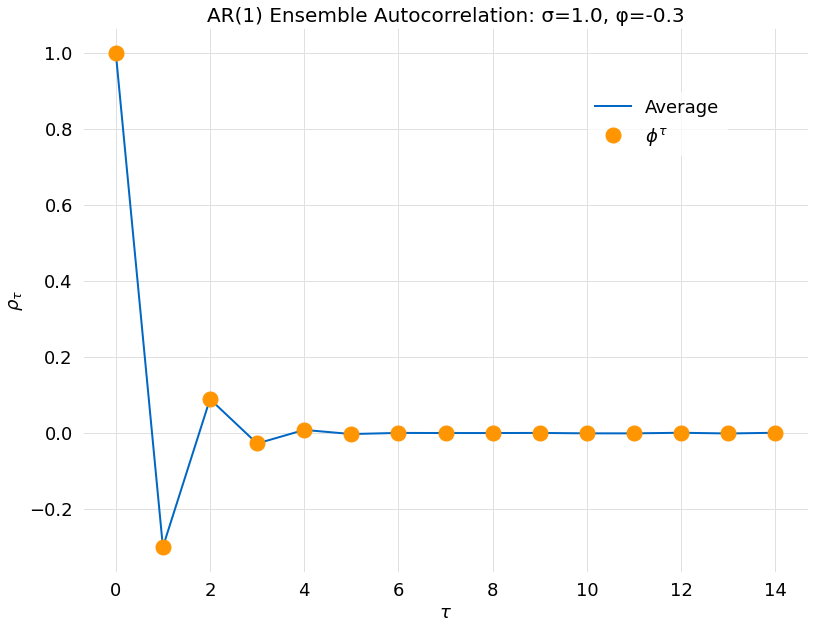

In [23]:
φ = -0.3
nplot = 15
nsample = 5000
nsim = 1000
title = f"AR(1) Ensemble Autocorrelation: σ={σ}, φ={φ}"
samples = ar1_ensemble(φ, nsample, nsim)
ac = stats.ensemble_acf(samples)
fcompare(ac[:nplot], title=title, params=[φ], npts=nplot, plot_type=FuncPlotType.AR1_ACF)